In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df=pd.read_csv("/content/cust_satisfaction.csv")
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [151]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [152]:
df.isnull().sum()
df.dropna(inplace=True)

In [153]:
df["Customer Type"].value_counts()

,count
Customer Type,
Loyal Customer,84517
disloyal Customer,18905


In [154]:
loyal_customer = df[df["Customer Type"] == "Loyal Customer"]
disloyal_customer = df[df["Customer Type"] == "disloyal Customer"]

In [155]:
disloyal_customer

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
9,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied,20,1061,2,4,2,0,0.0
10,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,24,1182,2,5,2,0,0.0
15,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied,13,486,4,4,4,1,0.0
24,Female,disloyal Customer,Business travel,Eco,satisfied,23,452,1,5,1,54,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103892,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied,37,596,3,3,3,110,121.0
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,24,1055,1,5,1,13,10.0
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0


In [156]:
loyal_customer=loyal_customer.sample(20000,replace=True)
loyal_customer.shape

(20000, 12)

In [157]:
balance_pf=pd.concat([loyal_customer,disloyal_customer],axis=0)
balance_pf.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
73031,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,46,1686,2,2,4,5,1.0
76171,Male,Loyal Customer,Business travel,Business,satisfied,56,1844,3,3,3,42,29.0
96129,Male,Loyal Customer,Business travel,Business,satisfied,40,2084,5,5,3,0,0.0
93688,Female,Loyal Customer,Business travel,Eco Plus,neutral or dissatisfied,43,357,3,4,2,187,185.0
20518,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,67,216,2,2,4,0,0.0


In [158]:
cat_col=balance_pf.select_dtypes(include="object")
cat_col.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
73031,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
76171,Male,Loyal Customer,Business travel,Business,satisfied
96129,Male,Loyal Customer,Business travel,Business,satisfied
93688,Female,Loyal Customer,Business travel,Eco Plus,neutral or dissatisfied
20518,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied


In [159]:
num_col=balance_pf.select_dtypes(exclude="object")
num_col.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
73031,46,1686,2,2,4,5,1.0
76171,56,1844,3,3,3,42,29.0
96129,40,2084,5,5,3,0,0.0
93688,43,357,3,4,2,187,185.0
20518,67,216,2,2,4,0,0.0


In [160]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
ohe=OneHotEncoder(drop="if_binary")
cat_col_encoded=ohe.fit_transform(cat_col).toarray()
cat_col_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [161]:
# pd.get_dummies(cat_col,drop_first=True)

In [162]:
column_name=list(ohe.get_feature_names_out())
column_name

['Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_satisfied']

In [163]:
one_hot=pd.DataFrame(cat_col_encoded,columns=column_name)
one_hot.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [164]:
one_hot=one_hot.reset_index(drop=True)
num_col=num_col.reset_index(drop=True)
final_df=pd.concat([one_hot,num_col],axis=1)
final_df.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46,1686,2,2,4,5,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,56,1844,3,3,3,42,29.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,40,2084,5,5,3,0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43,357,3,4,2,187,185.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,67,216,2,2,4,0,0.0


In [165]:
final_df.to_csv("cleaned_cust_statisfaction.csv",index=False)

In [167]:
x = final_df.drop("Customer Type_disloyal Customer",axis=1)
y = final_df[["Customer Type_disloyal Customer"]]

In [168]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [169]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
model.score(x_test,y_test)

0.860686287109626

In [171]:
model.score(x_train,y_train)

0.8633209099087521

In [172]:
pred=model.predict(x_test)
y_test["predictions"]=pred
y_test.head()

,Customer Type_disloyal Customer,predictions
18536,0.0,0.0
36240,1.0,1.0
5426,0.0,0.0
21679,1.0,1.0
18714,0.0,0.0


In [174]:
from sklearn.metrics import confusion_matrix

In [175]:
confusion_matrix(y_test["Customer Type_disloyal Customer"],
y_test["predictions"]                 )

array([[3427,  575],
       [ 509, 3270]])

<Axes: >

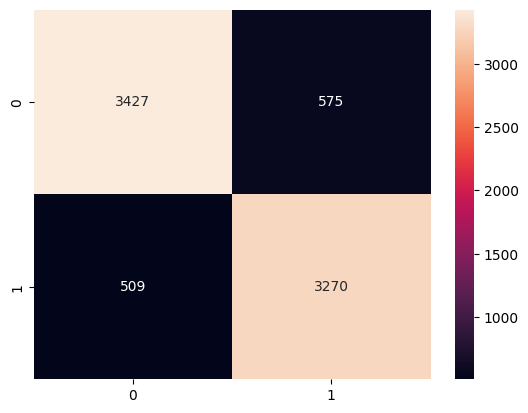

In [176]:
sns.heatmap(confusion_matrix(y_test["Customer Type_disloyal Customer"],
y_test["predictions"]),annot=True,fmt="d")

In [178]:
# classification report
# print(classification_report(y_test["Customer Type_disloyal Customer"],
# y_test["predictions"]))

In [179]:
 from sklearn.tree import DecisionTreeClassifier

In [180]:
df=pd.read_csv("/content/cleaned_cust_statisfaction.csv")
df

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46,1686,2,2,4,5,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,56,1844,3,3,3,42,29.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,40,2084,5,5,3,0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43,357,3,4,2,187,185.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,67,216,2,2,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38900,0.0,1.0,0.0,1.0,0.0,0.0,0.0,37,596,3,3,3,110,121.0
38901,0.0,1.0,0.0,0.0,1.0,0.0,0.0,24,1055,1,5,1,13,10.0
38902,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23,192,2,4,2,3,0.0
38903,1.0,1.0,0.0,1.0,0.0,0.0,0.0,30,1995,4,4,4,7,14.0


In [182]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [183]:
df.isnull().sum()
df.dropna(inplace=True)

In [185]:
df["Customer Type_disloyal Customer"].value_counts()

,count
Customer Type_disloyal Customer,
1.0,18905
0.0,17830
